In [1]:
reset -fs

In [2]:
import sys

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('/Users/rreilly/MSDS/msds621/MSDS621_Project/lyrics.csv')

In [4]:
df.groupby('genre').count()

,index,song,year,artist,lyrics
genre,,,,,
Country,17286,17286,17286,17286,14387
Electronic,16205,16205,16205,16205,7966
Folk,3241,3241,3241,3241,2243
Hip-Hop,33965,33965,33965,33965,24850
Indie,5732,5732,5732,5732,3149
Jazz,17147,17145,17147,17147,7971
Metal,28408,28408,28408,28408,23759
Not Available,29814,29814,29814,29814,23941
Other,23683,23683,23683,23683,5189


In [5]:
df = df[(df.genre == 'Country') | (df.genre == 'Metal') | (df.genre == 'Hip-Hop') | (df.genre == 'Jazz')
       | (df.genre == 'Electronic') ]
df = df[pd.notnull(df['lyrics'])]
df = df[df['genre']!= 'Not Available']
df = df[df['genre']!= 'Other']

In [6]:
df = df.replace({'\n': ' '}, regex=True)
df['word_count'] = df['lyrics'].str.split().str.len()

In [7]:
df.groupby('genre').count()

,index,song,year,artist,lyrics,word_count
genre,,,,,,
Country,14387,14387,14387,14387,14387,14387
Electronic,7966,7966,7966,7966,7966,7966
Hip-Hop,24850,24850,24850,24850,24850,24850
Jazz,7971,7970,7971,7971,7971,7971
Metal,23759,23759,23759,23759,23759,23759


In [8]:
train, test = train_test_split(df, test_size=0.2)
train_lyrics = df['lyrics']
train_genre = df['genre']

# Parametric Test

# Multinomial Bayes

### with 5 genres

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
pipeline = Pipeline([('vect', CountVectorizer(stop_words='english', 
                                              lowercase=True, 
                                              analyzer = 'word', 
                                              )),
                     ('clf', MultinomialNB(alpha=.1))]) 

In [11]:
pipeline.fit(train_lyrics, train_genre)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

In [12]:
pred = pipeline.predict(test['genre'])

In [13]:
con_mat = confusion_matrix(test['genre'], pred)

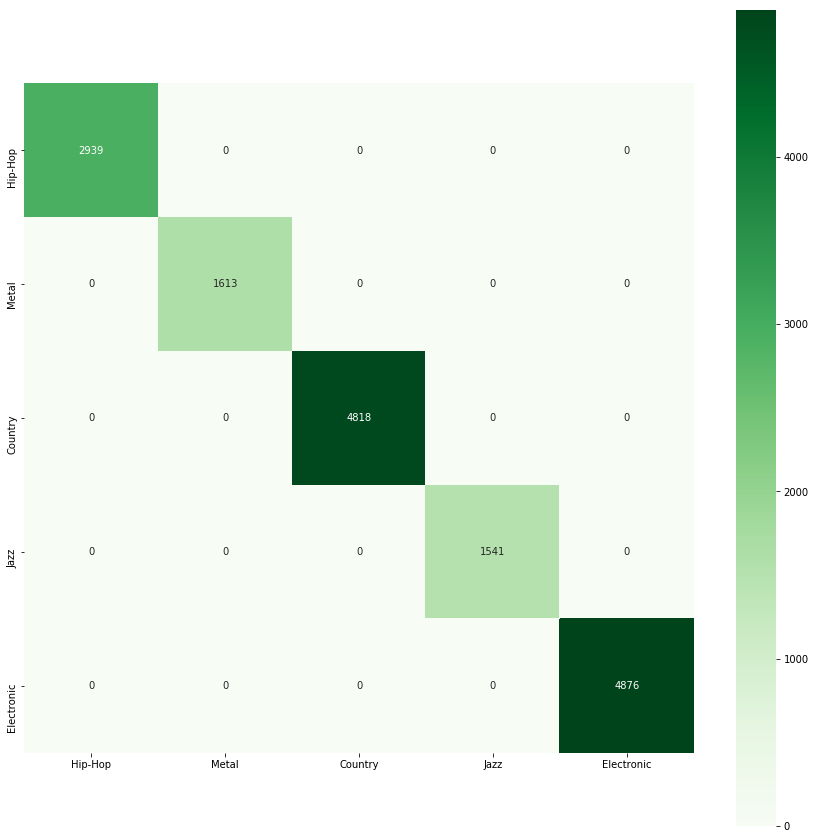

In [14]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(con_mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=df.genre.unique(), yticklabels=df.genre.unique(), cmap="Greens")

In [15]:
accuracy_score(pred, test['genre']) 

1.0

# Non Parametric Test

# Decision Tree

### with 2 genres

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [17]:
df = df[(df.genre == 'Country') | (df.genre == 'Metal')]
df = df[pd.notnull(df['lyrics'])]
df = df[df['genre']!= 'Not Available']
df = df[df['genre']!= 'Other']

In [18]:
train, test = train_test_split(df, test_size=0.2)
train_lyrics = df['lyrics']
train_genre = df['genre']

In [19]:
pipeline = Pipeline([('vect', CountVectorizer(stop_words='english', 
                                              lowercase=True, 
                                              analyzer = 'word', 
                                              )),
                     ('clf', DecisionTreeClassifier(max_depth=5, 
                                              random_state = 100,
                                              min_samples_leaf=5,
                                              min_samples_split=40))]) 

In [20]:
pipeline.fit(train_lyrics, train_genre)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...       min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'))])

In [21]:
pred = pipeline.predict(test['genre'])

In [22]:
accuracy_score(pred, test['genre']) 

0.6184796854521625

# Random Forest with 2 genre

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
df = df[(df.genre == 'Country') | (df.genre == 'Metal')]
df = df[pd.notnull(df['lyrics'])]
df = df[df['genre']!= 'Not Available']
df = df[df['genre']!= 'Other']

In [25]:
train, test = train_test_split(df, test_size=0.2)
train_lyrics = df['lyrics']
train_genre = df['genre']

In [26]:
pipeline = Pipeline([('vect', CountVectorizer(stop_words='english', 
                                              lowercase=True, 
                                              analyzer = 'word', 
                                              )),
                     ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))]) 

In [27]:
pipeline.fit(train_lyrics, train_genre)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...mators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [28]:
pred = pipeline.predict(test['genre'])

In [29]:
accuracy_score(pred, test['genre']) 

0.6187418086500656

# pie chart

In [38]:
df = df[(df.genre == 'Country') | (df.genre == 'Metal') | (df.genre == 'Hip-Hop') | (df.genre == 'Jazz')
       | (df.genre == 'Electronic') ]
df = df[pd.notnull(df['lyrics'])]
df = df[df['genre']!= 'Not Available']
df = df[df['genre']!= 'Other']

In [39]:
df.groupby('genre').count()

,index,song,year,artist,lyrics
genre,,,,,
Country,14387,14387,14387,14387,14387
Electronic,7966,7966,7966,7966,7966
Hip-Hop,24850,24850,24850,24850,24850
Jazz,7971,7970,7971,7971,7971
Metal,23759,23759,23759,23759,23759


In [40]:
import plotly.plotly as py
#import plotly as py
import plotly.graph_objs as go

labels = ['Country','Electronic','Hip-Hop','Jazz','Metal']
values = [14387,7966,24850,7971,23759]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

#plotly.tools.set_credentials_file(username='', api_key='')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~rreilly3/0 or inside your plot.ly account where it is named 'basic_pie_chart'


In [37]:
df = pd.read_csv('/Users/rreilly/MSDS/msds621/MSDS621_Project/lyrics.csv')
df = df[pd.notnull(df['lyrics'])]
df = df[df['genre']!= 'Not Available']
df = df[df['genre']!= 'Other']
df.groupby('genre').count()

,index,song,year,artist,lyrics
genre,,,,,
Country,14387,14387,14387,14387,14387
Electronic,7966,7966,7966,7966,7966
Folk,2243,2243,2243,2243,2243
Hip-Hop,24850,24850,24850,24850,24850
Indie,3149,3149,3149,3149,3149
Jazz,7971,7970,7971,7971,7971
Metal,23759,23759,23759,23759,23759
Pop,40466,40466,40466,40466,40466
R&B,3401,3401,3401,3401,3401


In [41]:
import plotly.plotly as py
import plotly 
import plotly.graph_objs as go

labels = ['Country','Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']
values = [14387,7966,2243,24850,3149,7971,23759, 40466,3401,109235]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

#plotly.tools.set_credentials_file(username='', api_key='')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~rreilly3/0 or inside your plot.ly account where it is named 'basic_pie_chart'
